# 3. Feature Engineering

## Setup

### Importing packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [4]:
df = pd.read_csv("dataframes/cleaned_dataframe.csv")

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
pd.set_option('display.max_columns', None)

### Drop variables, which have no insights for further research

In [5]:
df = df.drop (["project_ID","subcategory","category_ID","creator_ID","spotlight",
               "created_at","state_changed_at","deadline","goal_reached_time", "is_starrable"],axis=1)

In [6]:
df.head(5)

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,staff_pick,launched_at,creation_time_to_launch,planned_time
0,live,28645,28000.000,315,USD,24,13,fashion,US,False,1548223375,1878.936,1199.000
1,successful,1950,1000.000,47,USD,23,125,games,US,False,1502384459,194.546,720.000
2,successful,22404,15000.000,271,USD,51,108,music,US,False,1368421395,5398.295,720.000
3,failed,165,12160.657,3,GBP,34,133,games,GB,False,1484245376,129.196,1439.000
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,1355171527,98.460,720.000


In [7]:
df.shape

(182220, 13)

### Shorten Target variable state (to succesfull and failed)

In [8]:
df_encoded = df[df["state"]!="live"]
print(df_encoded.shape)
df_encoded = df_encoded[df_encoded["state"]!="canceled"]
print(df_encoded.shape)
df_encoded = df_encoded[df_encoded["state"]!="suspended"]
print(df_encoded.shape)
df.dtypes

(178218, 13)
(169600, 13)
(168977, 13)


state                        object
converted_pledged_amount      int64
goal_usd                    float64
backers_count                 int64
currency                     object
len_of_name                   int64
len_of_description            int64
metacategory                 object
country                      object
staff_pick                     bool
launched_at                   int64
creation_time_to_launch     float64
planned_time                float64
dtype: object

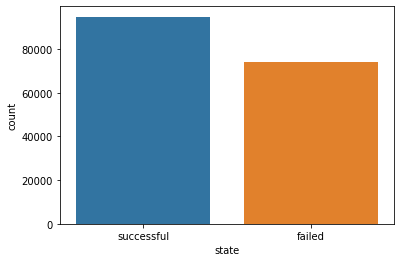

In [9]:
sns.countplot(x="state", data=df_encoded)

### Focus of analysis US, therefore Drop all non-US rows

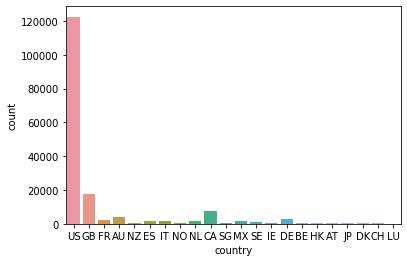

In [10]:
sns.countplot(x="country", data=df_encoded);

almost all projects in USA and business case is also in USA, so drop other countries

In [11]:
print(df_encoded.shape)
df_encoded = df_encoded[df_encoded['country'].str.match('US')]
df_encoded.shape

(168977, 13)


(122508, 13)

### Extract Months and Weekday

In [12]:
# convert launch date to timestamp
df_encoded['launched_at'] = pd.to_datetime(df_encoded['launched_at'],unit='s')
df_encoded


,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,staff_pick,launched_at,creation_time_to_launch,planned_time
1,successful,1950,1000.000,47,USD,23,125,games,US,False,2017-08-10 17:00:59,194.546,720.000
2,successful,22404,15000.000,271,USD,51,108,music,US,False,2013-05-13 05:03:15,5398.295,720.000
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,2012-12-10 20:32:07,98.460,720.000
5,successful,3725,3500.000,35,USD,31,134,music,US,False,2015-04-02 02:25:46,3824.832,720.000
6,successful,3890,2500.000,71,USD,51,123,music,US,False,2013-09-11 23:07:29,261.915,722.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182214,failed,12,15000.000,7,USD,11,134,music,US,False,2014-10-15 20:54:40,67.325,1441.000
182215,successful,4078,3883.000,108,USD,54,120,music,US,False,2014-08-04 17:29:16,429.936,1398.246
182217,successful,2681,2500.000,62,USD,53,132,technology,US,False,2012-08-14 20:36:30,1009.110,799.375
182218,successful,5692,5500.000,76,USD,35,135,film & video,US,False,2015-03-21 13:26:15,468.727,720.000


In [13]:
df_encoded["weekday_launched"] = df_encoded["launched_at"].dt.dayofweek
df_encoded["month_launched"] = df_encoded["launched_at"].dt.month
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].astype(str)
df_encoded["month_launched"] = df_encoded["month_launched"].astype(str)
df_encoded

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,staff_pick,launched_at,creation_time_to_launch,planned_time,weekday_launched,month_launched
1,successful,1950,1000.000,47,USD,23,125,games,US,False,2017-08-10 17:00:59,194.546,720.000,3,8
2,successful,22404,15000.000,271,USD,51,108,music,US,False,2013-05-13 05:03:15,5398.295,720.000,0,5
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,2012-12-10 20:32:07,98.460,720.000,0,12
5,successful,3725,3500.000,35,USD,31,134,music,US,False,2015-04-02 02:25:46,3824.832,720.000,3,4
6,successful,3890,2500.000,71,USD,51,123,music,US,False,2013-09-11 23:07:29,261.915,722.075,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182214,failed,12,15000.000,7,USD,11,134,music,US,False,2014-10-15 20:54:40,67.325,1441.000,2,10
182215,successful,4078,3883.000,108,USD,54,120,music,US,False,2014-08-04 17:29:16,429.936,1398.246,0,8
182217,successful,2681,2500.000,62,USD,53,132,technology,US,False,2012-08-14 20:36:30,1009.110,799.375,1,8
182218,successful,5692,5500.000,76,USD,35,135,film & video,US,False,2015-03-21 13:26:15,468.727,720.000,5,3


In [14]:
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("0","Monday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("1","Tuesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("2","Wednesday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("3","Thursday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("4","Friday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("5","Saturday")
df_encoded["weekday_launched"] = df_encoded["weekday_launched"].str.replace("6","Sunday")

df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("12","December")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("11","November")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("10","October")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("1","January")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("2","February")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("3","March")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("4","April")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("5","May")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("6","June")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("7","July")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("8","August")
df_encoded["month_launched"] = df_encoded["month_launched"].str.replace("9","September")

### Extract hours

In [15]:
df_encoded["hour_of_day"] = df_encoded["launched_at"].dt.hour
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].astype("str")

df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("23","a")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("22","b")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("21","c")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("20","d")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("19","e")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("18","f")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("17","g")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("16","h")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("15","i")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("14","j")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("13","k")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("12","l")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("11","m")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("10","n")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("9","o")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("8","p")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("7","q")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("6","r")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("5","s")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("4","t")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("3","u")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("2","v")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("1","w")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("0","x")

df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("a","00:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("b","23:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("c","22:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("d","21:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("e","20:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("f","19:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("g","18:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("h","17:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("i","16:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("j","15:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("k","14:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("l","13:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("m","12:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("n","11:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("o","10:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("p","09:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("q","08:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("r","07:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("s","06:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("t","05:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("u","04:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("v","03:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("w","02:00")
df_encoded["hour_of_day"] = df_encoded["hour_of_day"].str.replace("x","01:00")

df_encoded = df_encoded.drop (["launched_at"],axis=1)
df_encoded.head()

,state,converted_pledged_amount,goal_usd,backers_count,currency,len_of_name,len_of_description,metacategory,country,staff_pick,creation_time_to_launch,planned_time,weekday_launched,month_launched,hour_of_day
1,successful,1950,1000.000,47,USD,23,125,games,US,False,194.546,720.000,Thursday,August,18:00
2,successful,22404,15000.000,271,USD,51,108,music,US,False,5398.295,720.000,Monday,May,06:00
4,successful,2820,2800.000,3,USD,40,121,publishing,US,False,98.460,720.000,Monday,December,21:00
5,successful,3725,3500.000,35,USD,31,134,music,US,False,3824.832,720.000,Thursday,April,03:00
6,successful,3890,2500.000,71,USD,51,123,music,US,False,261.915,722.075,Wednesday,September,00:00


In [16]:
df_encoded.columns

Index(['state', 'converted_pledged_amount', 'goal_usd', 'backers_count',
       'currency', 'len_of_name', 'len_of_description', 'metacategory',
       'country', 'staff_pick', 'creation_time_to_launch', 'planned_time',
       'weekday_launched', 'month_launched', 'hour_of_day'],
      dtype='object')

### Save dataset for EDA after Feature Engineering

In [17]:
df_encoded.to_csv(r'dataframes/eda_dataframe.csv', index = False, header=True)

### Handling categorical variables -> One hot encoding:

In [18]:
df_dummies = df_encoded.copy()
#dummy variables for metacategory
metacategory_dummies = pd.get_dummies(df_dummies["metacategory"], drop_first = True)
#dummy variables for currency:
curreny_dummies = pd.get_dummies(df_dummies["currency"], drop_first = True)
#dummy variables for country:
country_dummies = pd.get_dummies(df_dummies["country"], drop_first = True)
#dummy variables for staff_pick:
staff_pick_dummies = pd.get_dummies(df_dummies["staff_pick"], drop_first = True)
#dummy variables for weekday_launched
weekday_launched_dummies = pd.get_dummies(df_dummies["weekday_launched"], drop_first = True)
#dummy variables for month_launched
month_launched_dummies = pd.get_dummies(df_dummies["month_launched"], drop_first = True)
#dummy variables for hour_of_day
hour_of_day_dummies = pd.get_dummies(df_dummies["hour_of_day"], drop_first = True)
# adding it to Dataframe - df_dummies:
df_dummies = pd.concat([df_dummies, metacategory_dummies, curreny_dummies, 
                        country_dummies, weekday_launched_dummies, month_launched_dummies, 
                        hour_of_day_dummies, staff_pick_dummies], axis=1)
# droping original column:
df_dummies = df_dummies.drop(["metacategory","currency","country", "staff_pick", 
                              "weekday_launched", "month_launched", "hour_of_day"],axis=1)
df_dummies.rename(columns={ df_dummies.columns[-1]: "staff_pick" }, inplace = True)
#### Transform target variable state in 0s (failed) and 1s (succesfull):
df_dummies['state'] = df_dummies['state'].map({'successful': 1, 'failed': 0})
###show results
df_dummies.head()

,state,converted_pledged_amount,goal_usd,backers_count,len_of_name,len_of_description,creation_time_to_launch,planned_time,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,staff_pick
1,1,1950,1000.000,47,23,125,194.546,720.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,22404,15000.000,271,51,108,5398.295,720.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2820,2800.000,3,40,121,98.460,720.000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,3725,3500.000,35,31,134,3824.832,720.000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,3890,2500.000,71,51,123,261.915,722.075,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Visualizing the correlation between target variable (state) and all other variables :

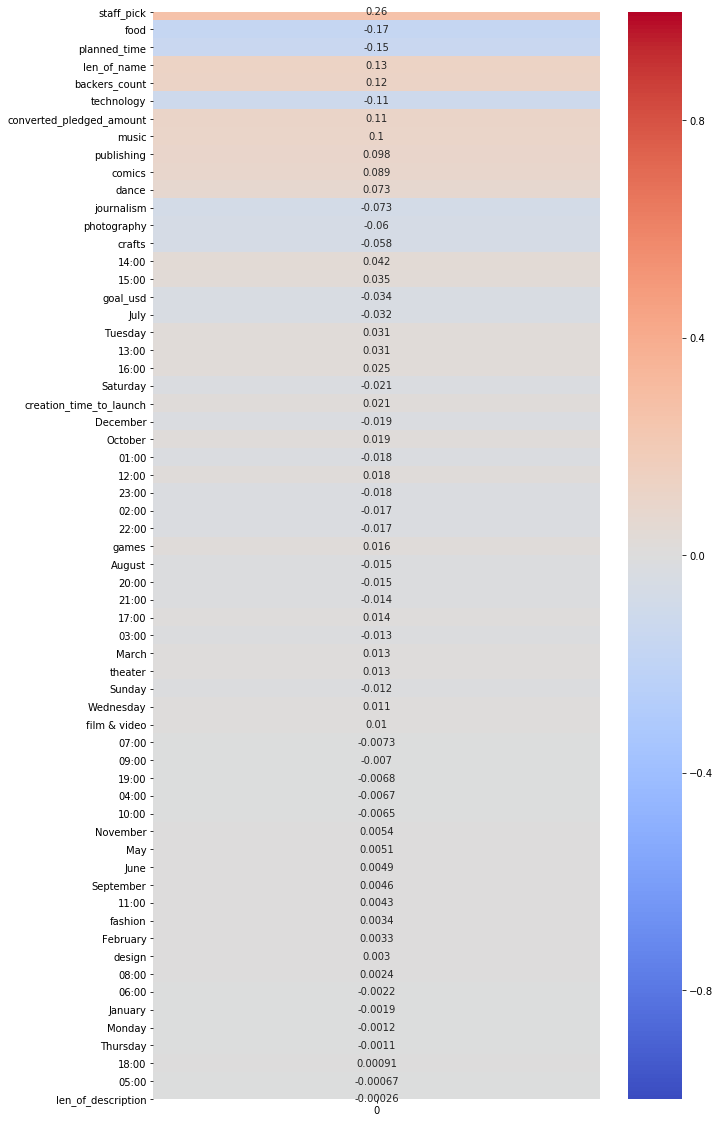

In [19]:
correlations = df_dummies.corrwith(df_dummies['state']).iloc[1:].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

### Save file for predictive modeling:

In [20]:
df_base = df_dummies.copy()
df_base.to_csv(r'dataframes/baseline_dataframe.csv', index = False, header=True)